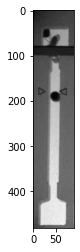

In [55]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

#Set video path
video_path = "/Users/ulric/Movies/Videos_NumOrdered/"
# Select and open a video
video_file = "arena1_corridor_1.mp4"
video = cv2.VideoCapture(video_path + video_file)
# Get the video first frame as grayscale and display it
ret, frame = video.read()
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap="gray")
plt.show()

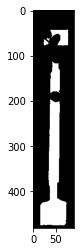

In [56]:
# Binaries the image
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(thresh, cmap="gray")

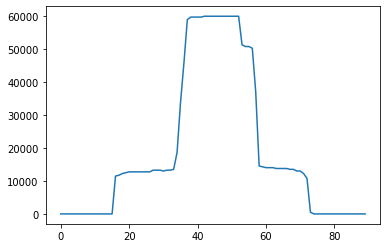

In [57]:
# Generate the rows histogram
histogram = np.sum(thresh[thresh.shape[0] // 2:, :], axis=0)
plt.plot(histogram)

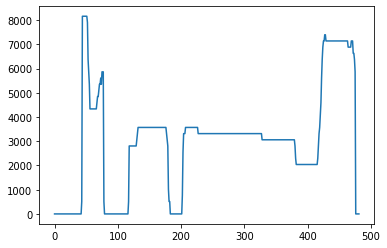

In [58]:
# same with columns
histogram = np.sum(thresh[:, thresh.shape[1] // 2:], axis=1)
plt.plot(histogram)

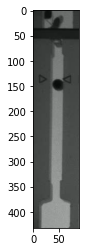

In [59]:
# Find the x coordinates where the histogram is first greater than 0 and last greater than 0
x = np.where(histogram > 0)[0]
x1 = x[0]
x2 = x[-1]

# Crop the initial image using x1 and x2 coordinates
crop = frame[x1:x2, :]
plt.imshow(crop, cmap="gray")

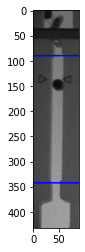

In [61]:
# Add an horizontal red line at the 90 and final - 90 pixels
crop = cv2.line(crop, (0, 90), (crop.shape[1], 90), (0, 0, 255), 2)
crop = cv2.line(crop, (0, crop.shape[0] - 90), (crop.shape[1], crop.shape[0] - 90),
                (0, 0, 255), 2)

# Display the cropped image
plt.imshow(crop, cmap="gray")


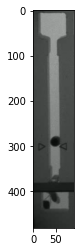

In [35]:
# If the right en values are higher than the left ones, the fly is flipped and image should be flipped
# Check if the fly is flipped
if np.sum(histogram[:histogram.shape[0] // 2]) < np.sum(
    histogram[histogram.shape[0] // 2:]
):
    flipped = True
else:
    flipped = False

# If the image is flipped, flip it back along thehorizontal axis
if flipped:
    frame = cv2.flip(frame, 0)

# Display the flipped image
plt.imshow(frame)

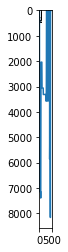

In [38]:
# Update the binary image
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
# Binaries the image
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(thresh, cmap="gray")

# Do the col histogram again
histogram = np.sum(thresh[:, thresh.shape[1] // 2:], axis=1)
plt.plot(histogram)

In [19]:
# crop the image according to the positive and negative peaks of the histogram
# Get the positive and negative peaks with scipy find_peaks
from scipy.signal import find_peaks

pos_peak, _ = find_peaks(histogram[:histogram.shape[0] // 2], height=100)
neg_peak, _ = find_peaks(-histogram[histogram.shape[0] // 2:], height=-100)


ValueError: `x` must be a 1-D array

In [ ]:

# Display the peaks
plt.plot(histogram)
plt.plot(pos_peak, histogram[pos_peak], "x")
plt.plot(neg_peak + histogram.shape[0] // 2, histogram[neg_peak], "x")


In [ ]:

# Crop the image
frame = frame[neg_peak:pos_peak, :]
plt.imshow(frame)